# Cyberbullying Detection on Twitter

## Introduction
In today's digital age, social media platforms have become a prominent avenue for communication and expression. However, the rise of these platforms has also led to an alarming increase in cyberbullying incidents, particularly during the Covid-19 pandemic when online interactions surged. This project aims to tackle this pressing issue by analyzing a dataset containing over 47,000 tweets labeled according to various classes of cyberbullying.

The primary objective of this project is to develop machine learning models that can automatically identify and flag potentially harmful tweets, thereby contributing to a safer online environment. By breaking down the patterns of hatred and discrimination found in these tweets, we hope to gain insights that can inform strategies to mitigate cyberbullying.

The dataset comprises tweets categorized into several types of cyberbullying, including ageism, ethnic discrimination, gender-based attacks, and religious intolerance, as well as tweets that do not fall under these categories. Each category contains approximately 8,000 samples, ensuring a balanced dataset for effective model training.

Throughout this notebook, we will perform various analyses, including exploratory data analysis (EDA), data visualization, and the development of classification models. We will evaluate the models using key performance metrics such as accuracy, precision, recall, and F1 score. Ultimately, this project seeks to shed light on the patterns of cyberbullying on social media and pave the way for future advancements in detection techniques.

Let’s begin by loading the necessary libraries and the dataset for our analysis.

## Table of Contents
1. [Package Installation](#package-installation)
2. [Library Imports](#library-imports)
3. [Data Loading](#data-loading)
4. [Initial Data Exploration](#initial-data-exploration)
5. [Data Visualization](#data-visualization)
6. [Correlation Analysis](#correlation-analysis)
7. [Data Preparation](#data-preparation)
8. [Modeling](#modeling)
9. [Model Evaluation](#model-evaluation)
10. [Conclusion and Next Steps](#conclusion-and-next-steps)

## Package Installation <a name="package-installation"></a>
In this cell, we will install the necessary Python packages required for our data analysis project. This step ensures that all the libraries needed for data manipulation, visualization, and machine learning are available in our environment. 

We will use the `pip` command to install the following libraries:

- **NumPy**: A library for numerical computations and handling arrays.
- **Pandas**: A powerful data manipulation and analysis library, particularly useful for working with structured data.
- **Matplotlib**: A plotting library for creating static, animated, and interactive visualizations in Python.
- **Seaborn**: A statistical data visualization library based on Matplotlib that provides a high-level interface for drawing attractive graphics.
- **Scikit-learn**: A machine learning library that provides simple and efficient tools for data mining and data analysis.

In [ ]:
# List of required libraries
required_libraries = [
    'numpy',
    'pandas',
    'matplotlib',
    'seaborn',
    'nltk',
    'keras'
]

def install(package):
    """Install the package using pip in a Jupyter Notebook."""
    print(f"Installing {package}...")
    # Use the Jupyter magic command for installation
    get_ipython().system(f'pip install {package}')

def check_libraries(libraries):
    """Check if the libraries are installed and install them if necessary."""
    missing_libraries = []

    for library in libraries:
        try:
            __import__(library)
        except ImportError:
            missing_libraries.append(library)
        except Exception as e:
            # Captura outros erros que podem ocorrer durante a importação
            print(f"Error importing {library}: {e}")
            missing_libraries.append(library)

    if missing_libraries:
        print(f"The following libraries are missing: {', '.join(missing_libraries)}")
        print("Starting installation...")

        installation_success = True  # Flag to track installation success

        for library in missing_libraries:
            try:
                install(library)
                print(f"{library} installed successfully.")
            except Exception as e:
                print(f"Failed to install {library}: {e}")
                installation_success = False  # Mark as failed if there was an error

        # Check again if the libraries were installed
        for library in missing_libraries:
            try:
                __import__(library)
            except ImportError:
                print(f"Error: {library} was not installed correctly.")
                installation_success = False  # Mark as failed if still missing

        # Final message based on installation success
        if installation_success:
            print("All libraries were installed successfully.")
        else:
            print("Some libraries were not installed correctly.")
    else:
        print("All libraries are already installed.")

if __name__ == "__main__":
    check_libraries(required_libraries)

## Library Imports <a name="library-imports"></a>
In this cell, we will import all the necessary libraries that we will use throughout the analysis. This includes libraries for data manipulation, visualization, and machine learning.

In [93]:
import re
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

## Data Loading <a name="data-loading"></a>
Here, we will load the dataset containing information about students' alcohol consumption and related factors. We will examine the structure of the data and check for any initial issues such as missing values.

In [72]:
warnings.filterwarnings('ignore')

# Paths to the CSV files
path_data = '../data/cyberbullying_tweets.csv'

# Reading the CSV files
df = pd.read_csv(path_data)

In [73]:
# Display the first few rows of dataset to verify the reading
print("\nCyberbullying Data:")
print(df.head())


Cyberbullying Data:
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


In [74]:
# Using shape to check the dimensions of the combined DataFrame
print("\nShape of Combined Data:", df.shape)


Shape of Combined Data: (47692, 2)


## Initial Data Exploration <a name="initial-data-exploration"></a>
In this section, we will perform an exploratory data analysis (EDA) to understand the dataset better. We will look at the data types, summary statistics, and any missing values, which will help us determine the next steps for cleaning and preparing the data.

In [75]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 tweet_text            0
cyberbullying_type    0
dtype: int64


In [76]:
# Check data types
data_types = df.dtypes
print("\nData Types of Each Column:\n", data_types)


Data Types of Each Column:
 tweet_text            object
cyberbullying_type    object
dtype: object


In [77]:
# Summary statistics for numerical columns
summary_statistics = df.describe()
print("\nSummary Statistics:\n", summary_statistics)


Summary Statistics:
                                                tweet_text cyberbullying_type
count                                               47692              47692
unique                                              46017                  6
top     RT @sailorhg: the intro for my hardware hackin...           religion
freq                                                    2               7998


In [78]:
# Check unique values in categorical columns
for column in df[['cyberbullying_type']].select_dtypes(include=['object']).columns:
    print(f"\nUnique Values in '{column}':\n", df[column].value_counts())


Unique Values in 'cyberbullying_type':
 cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


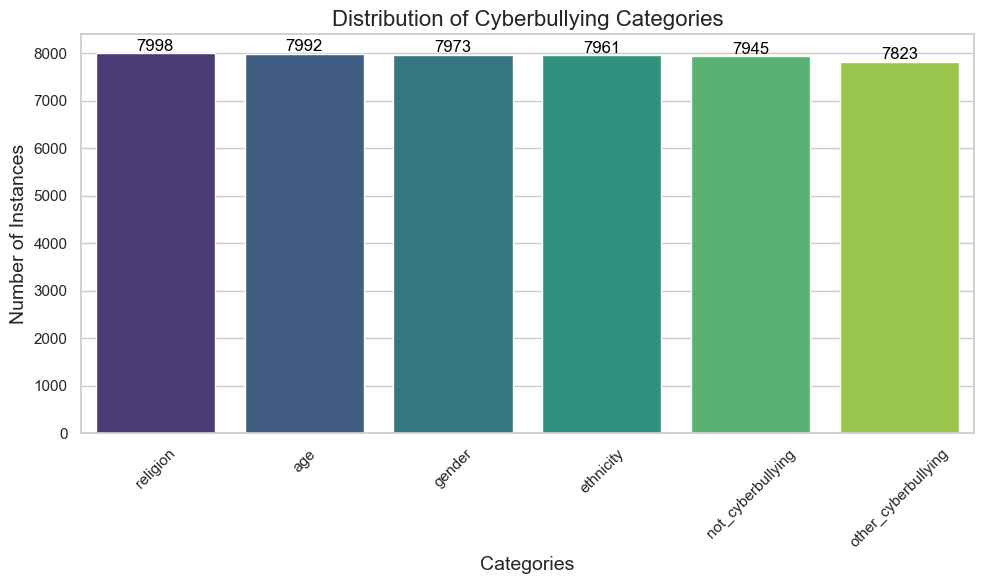

In [79]:
# Plotting the distribution graph

# Check the distribution of categories
category_counts = df['cyberbullying_type'].value_counts()  # Change 'label' to your actual column name for categories

# Create a DataFrame for the counts
category_distribution = category_counts.reset_index()
category_distribution.columns = ['Category', 'Count']  # Rename columns for clarity

# Set the visual style of the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
bar_plot = sns.barplot(data=category_distribution, x='Category', y='Count', palette='viridis')

# Add titles and labels
plt.title('Distribution of Cyberbullying Categories', fontsize=16)  # Title of the plot
plt.xlabel('Categories', fontsize=14)  # X-axis label
plt.ylabel('Number of Instances', fontsize=14)  # Y-axis label

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Add value annotations on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      fontsize=12, color='black', 
                      xytext=(0, 5),
                      textcoords='offset points')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

## Data Preparation <a name="data-preparation"></a>
Before modeling, we need to prepare the data. This includes handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets.

In [80]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean and process tweets
def preprocess_tweet(tweet):
    # Remove URLs, mentions, and special characters
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)

    # Convert to lowercase
    tweet = tweet.lower()

    # Remove stop words
    tweet = ' '.join(word for word in tweet.split() if word not in stop_words)

    return tweet

# Apply the preprocessing function
df['cleaned_text'] = df['tweet_text'].apply(preprocess_tweet)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\richena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


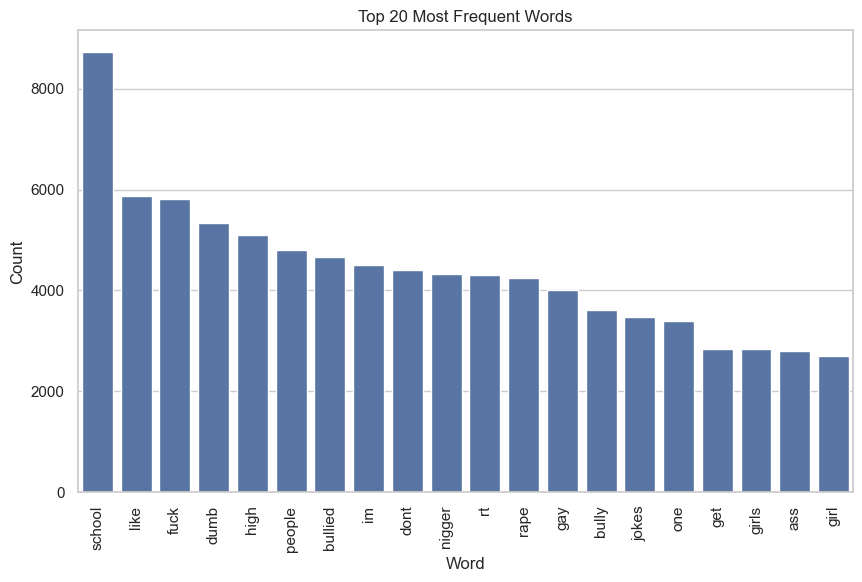

In [87]:
# Initialize the Count Vectorizer with a maximum of 1000 features
vectorizer = CountVectorizer(max_features=1000)

# Fit and transform the cleaned text data into a matrix of token counts
X = vectorizer.fit_transform(df['cleaned_text']).toarray()

# Visualization of word frequency
# Create a DataFrame from the matrix with feature names as columns
word_freq = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

# Sum the frequencies of each word and sort them in descending order
word_freq_sum = word_freq.sum().sort_values(ascending=False)

# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a bar plot for the top 20 most frequent words
top_words = word_freq_sum.head(20)
sns.barplot(x=top_words.index, y=top_words.values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title and labels of the plot
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Word')  # Set the label for the X-axis
plt.ylabel('Count')  # Set the label for the Y-axis

# Display the plot
plt.show()

## Modeling <a name="modeling"></a>
In this section, we will build machine learning models to predict students' academic performance based on their alcohol consumption and other features. We will choose appropriate algorithms and fit them to our training data.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['cyberbullying_type'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)

## Model Evaluation <a name="model-evaluation"></a>
After building our models, we will evaluate their performance using various metrics. We will compare the predictions against the actual outcomes to determine how well our models are performing.

In [96]:
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

                age       0.81      0.94      0.87      1603
          ethnicity       0.89      0.91      0.90      1603
             gender       0.72      0.78      0.75      1531
  not_cyberbullying       0.61      0.43      0.51      1624
other_cyberbullying       0.57      0.51      0.54      1612
           religion       0.83      0.94      0.88      1566

           accuracy                           0.75      9539
          macro avg       0.74      0.75      0.74      9539
       weighted avg       0.74      0.75      0.74      9539



## Conclusion and Next Steps <a name="conclusion-and-next-steps"></a>
In the final section, we will summarize our findings from the analysis and discuss potential next steps. This may include further analysis, model improvements, or recommendations for educators based on the insights gained from the data.